In [1]:
import numpy as np
import matplotlib.cm as cm
from matplotlib import ticker
import math
import scipy
from scipy import spatial
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import dask
from sklearn.neighbors import KDTree
import netCDF4
from metpy import calc
from metpy.units import units
import matplotlib.cm as cm
import warnings
warnings.filterwarnings("ignore")
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [2]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

Change the path of the file below to your general latent space (Not one from any of the specific locations). This will be the same latent space you used to make the intensity and land/sea plots

In [3]:
global_z_space = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/model_graphs/latent_space/Trackable_2D_PCA_Latent_Space__31.npy")


The paths below correspond to the latent spaces from the 4 locations of interest (These are the same paths you will have used in the script to run for the diurnal cycle animations). For now use the Synoptic Data (which you already have and used for the diurnal animations). But when I give you the full data, I would copy this notebook and change the four paths to the full data (will need to edit the config file test data for each of the 4 locations to generate 4 new latent spaces again first)

In [5]:
All_Amazon_Z = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/model_graphs/latent_space/Full_Winter_Amazon_2D_PCA_Latent_Space__31.npy")
All_SC_Cloud_Z = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/model_graphs/latent_space/Full_Winter_SC_Cloud_2D_PCA_Latent_Space__31.npy")
All_Desert_Z = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/model_graphs/latent_space/Full_Winter_Desert_2D_PCA_Latent_Space__31.npy")
All_Warm_Pool_Z = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/model_graphs/latent_space/Full_Winter_Warm_Pool_2D_PCA_Latent_Space__31.npy")


In [ ]:
amazon_labels = np.empty(shape=(len(All_Amazon_Z)))
sc_labels = np.empty(shape=(len(All_SC_Cloud_Z)))
desert_labels = np.empty(shape=(len(All_Desert_Z)))
warm_pool_labels = np.empty(shape=(len(All_Warm_Pool_Z)))

count = 0
for i in range(24):
    for j in range(4):
        amazon_labels[count::96] = i
        sc_labels[count::96] = i
        desert_labels[count::96] = i
        warm_pool_labels[count::96] = i
        count = count+1

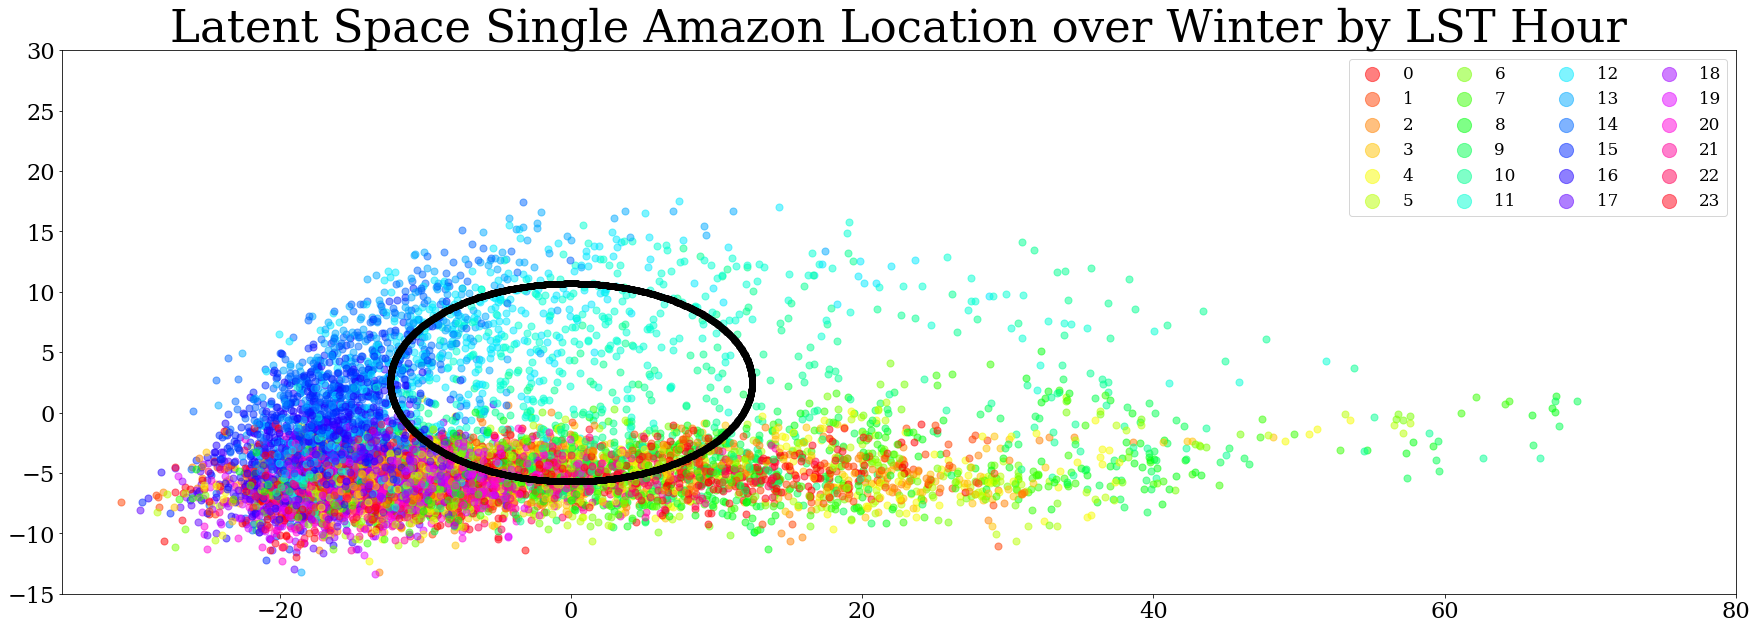

In [33]:
colors = cm.hsv(np.linspace(0, 1, 24))
fig, ax = plt.subplots(figsize=(30, 10))
obs = []
for i in range(len(All_Amazon_Z)):
    if int(amazon_labels[i]) not in obs:
        obs.append(int(amazon_labels[i]))
        ax.scatter(x=All_Amazon_Z[i, 0], y=All_Amazon_Z[i, 1], c=colors[int(amazon_labels[i])], s=50.0, alpha=0.5, label = str(int(amazon_labels[i])))
    else:
        ax.scatter(x=All_Amazon_Z[i, 0], y=All_Amazon_Z[i, 1], c=colors[int(amazon_labels[i])], s=50.0, alpha=0.5)
        

                 
lgnd = ax.legend(loc="best", ncol=4, fontsize=fz*0.75)
for handle in lgnd.legendHandles:
    handle.set_sizes([200.0])
    
    

ax.set_title("Latent Space Single Amazon Location over Winter by LST Hour", fontsize=fz*2)
print(" ")

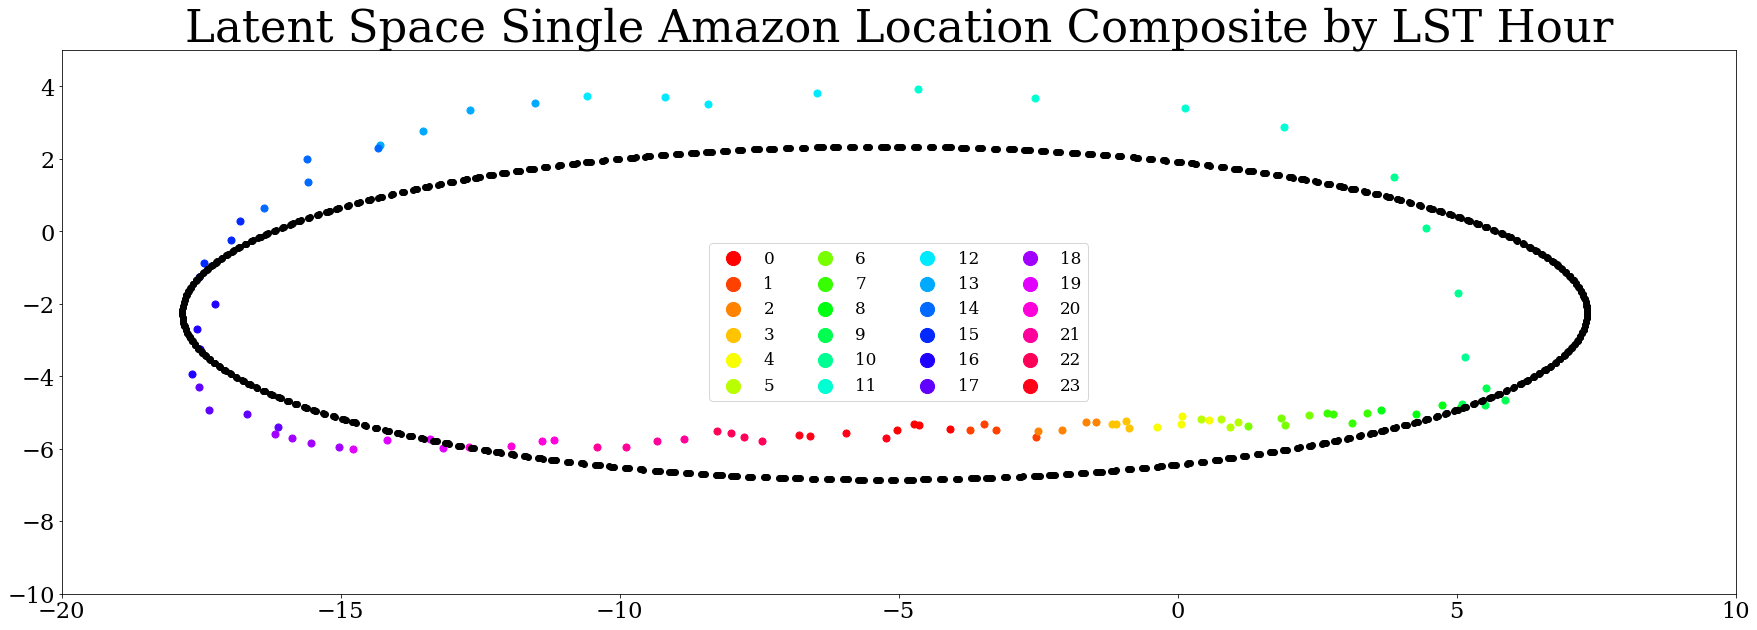

In [257]:
colors = cm.hsv(np.linspace(0, 1, 24))
fig, ax = plt.subplots(figsize=(30, 10))
obs = []
for i in range(len(amazon_composite)):
    if int(amazon_labels[i]) not in obs:
        obs.append(int(amazon_labels[i]))
        ax.scatter(x=amazon_composite[i, 0], y=amazon_composite[i, 1], c=colors[int(amazon_labels[i])], s=50.0, label = str(int(amazon_labels[i])))
    else:
        ax.scatter(x=amazon_composite[i, 0], y=amazon_composite[i, 1], c=colors[int(amazon_labels[i])], s=50.0)
        

                 
lgnd = ax.legend(loc="best", ncol=4, fontsize=fz*0.75)
for handle in lgnd.legendHandles:
    handle.set_sizes([200.0])
    
    

ax.set_title("Latent Space Single Amazon Location Composite by LST Hour", fontsize=fz*2)
print(" ")

# SC Cloud

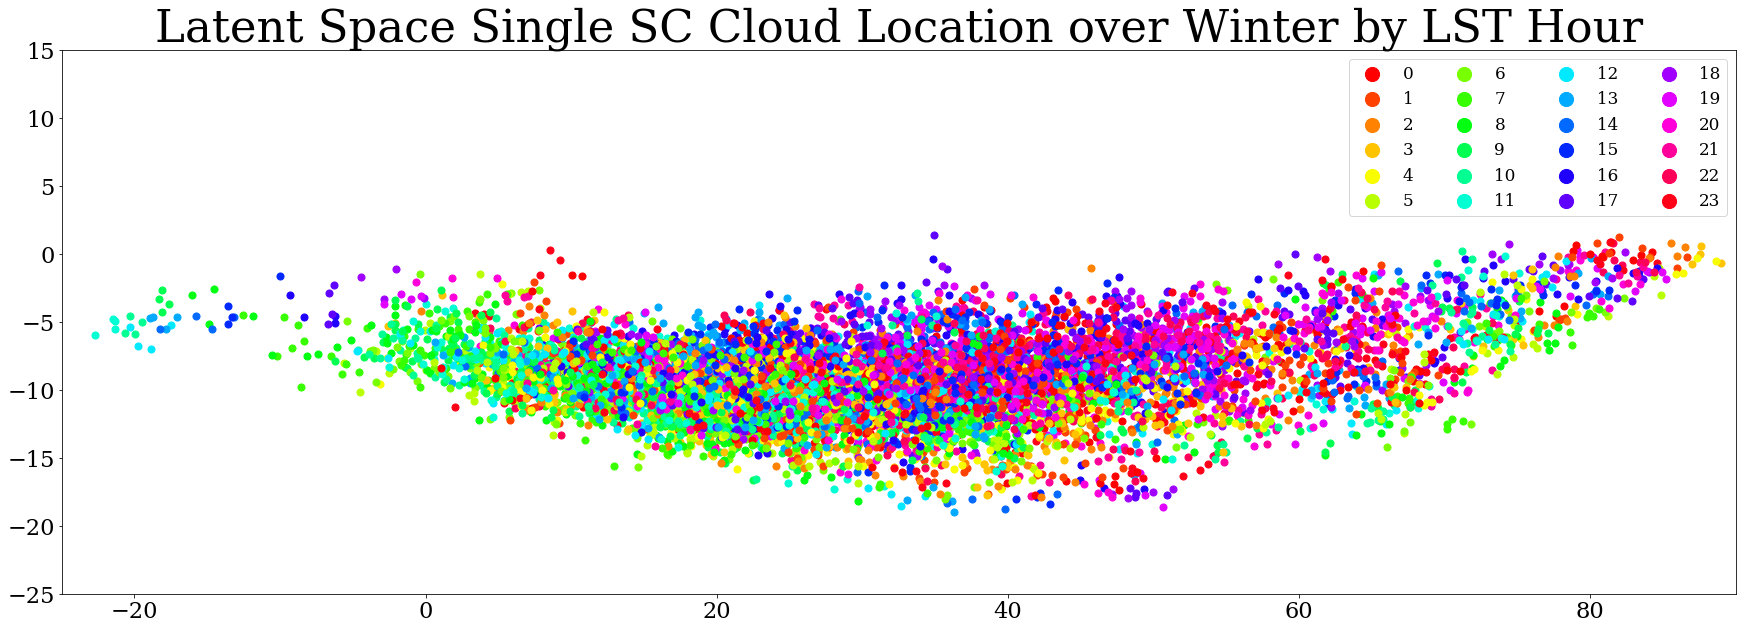

In [13]:
colors = cm.hsv(np.linspace(0, 1, 24))
fig, ax = plt.subplots(figsize=(30, 10))
obs = []
for i in range(len(All_SC_Cloud_Z)):
    if int(sc_labels[i]) not in obs:
        obs.append(int(sc_labels[i]))
        ax.scatter(x=All_SC_Cloud_Z[i, 0], y=All_SC_Cloud_Z[i, 1], c=colors[int(sc_labels[i])], s=50.0, label = str(int(sc_labels[i])))
    else:
        ax.scatter(x=All_SC_Cloud_Z[i, 0], y=All_SC_Cloud_Z[i, 1], c=colors[int(sc_labels[i])], s=50.0)
        

                 
lgnd = ax.legend(loc="best", ncol=4, fontsize=fz*0.75)
for handle in lgnd.legendHandles:
    handle.set_sizes([200.0])
    
    

ax.set_title("Latent Space Single SC Cloud Location over Winter by LST Hour", fontsize=fz*2)
print(" ")

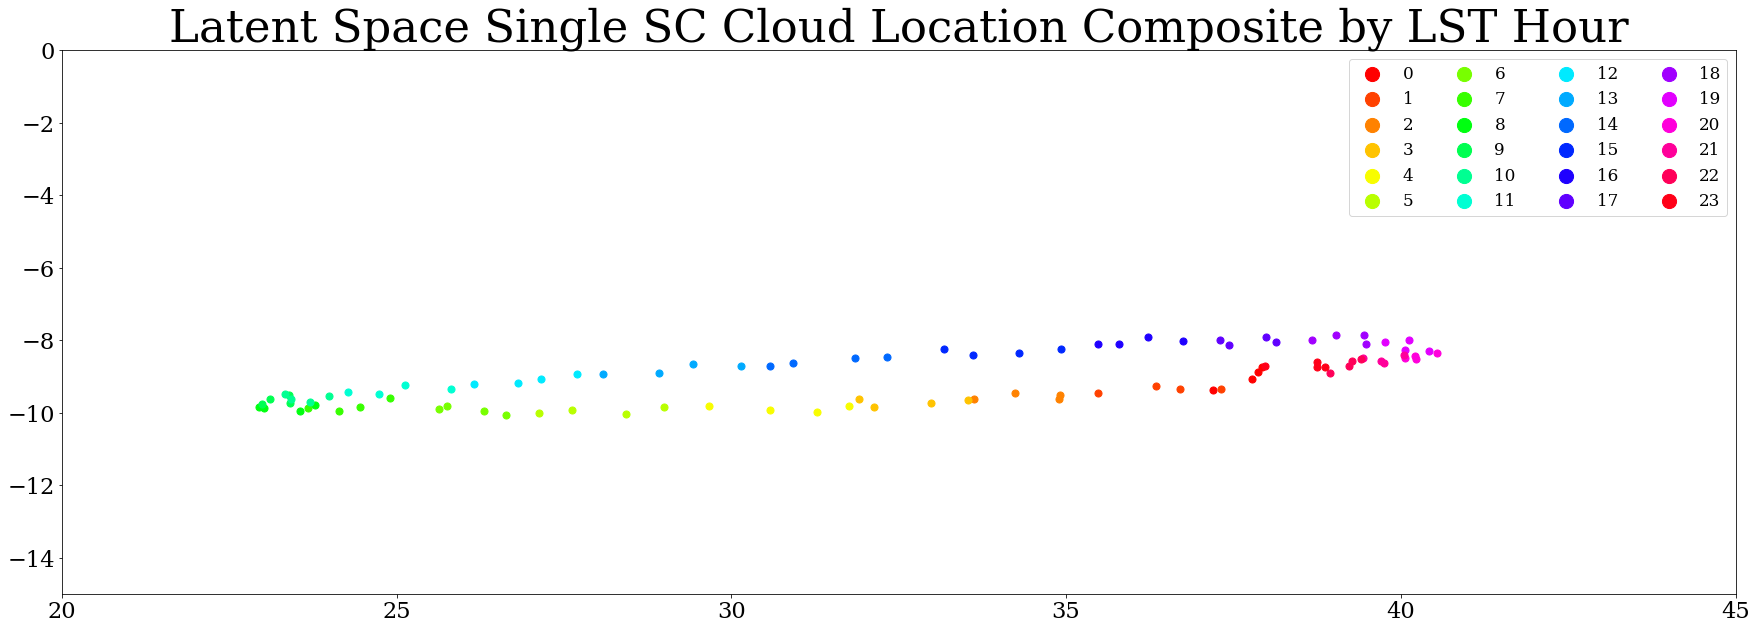

In [14]:
colors = cm.hsv(np.linspace(0, 1, 24))
fig, ax = plt.subplots(figsize=(30, 10))
obs = []
for i in range(len(sc_composite)):
    if int(sc_labels[i]) not in obs:
        obs.append(int(sc_labels[i]))
        ax.scatter(x=sc_composite[i, 0], y=sc_composite[i, 1], c=colors[int(sc_labels[i])], s=50.0, label = str(int(sc_labels[i])))
    else:
        ax.scatter(x=sc_composite[i, 0], y=sc_composite[i, 1], c=colors[int(sc_labels[i])], s=50.0)
        

                 
lgnd = ax.legend(loc="best", ncol=4, fontsize=fz*0.75)
for handle in lgnd.legendHandles:
    handle.set_sizes([200.0])
    
    

ax.set_title("Latent Space Single SC Cloud Location Composite by LST Hour", fontsize=fz*2)
print(" ")

# Desert

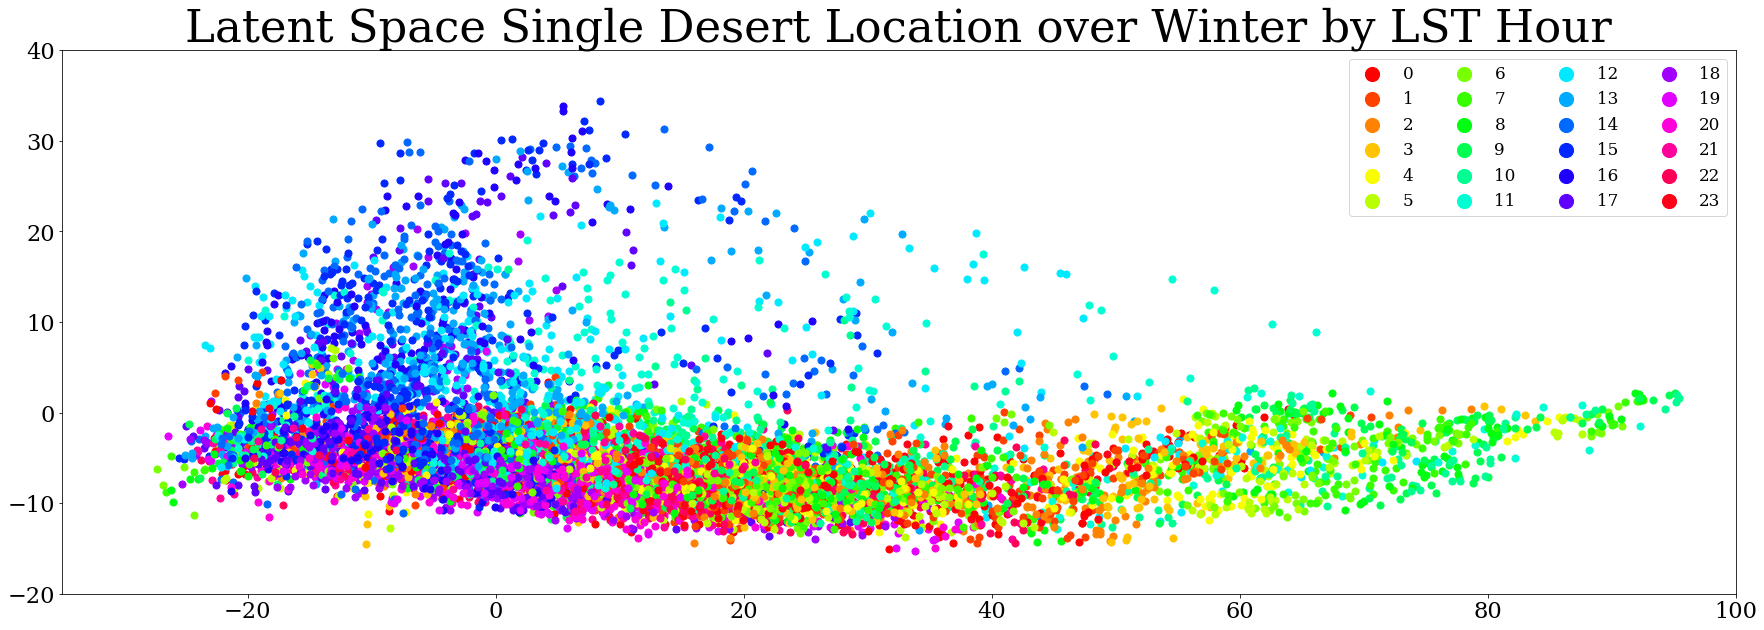

In [15]:
colors = cm.hsv(np.linspace(0, 1, 24))
fig, ax = plt.subplots(figsize=(30, 10))
obs = []
for i in range(len(All_Desert_Z)):
    if int(desert_labels[i]) not in obs:
        obs.append(int(desert_labels[i]))
        ax.scatter(x=All_Desert_Z[i, 0], y=All_Desert_Z[i, 1], c=colors[int(desert_labels[i])], s=50.0, label = str(int(desert_labels[i])))
    else:
        ax.scatter(x=All_Desert_Z[i, 0], y=All_Desert_Z[i, 1], c=colors[int(desert_labels[i])], s=50.0)
        

                 
lgnd = ax.legend(loc="best", ncol=4, fontsize=fz*0.75)
for handle in lgnd.legendHandles:
    handle.set_sizes([200.0])
    
    

ax.set_title("Latent Space Single Desert Location over Winter by LST Hour", fontsize=fz*2)
print(" ")

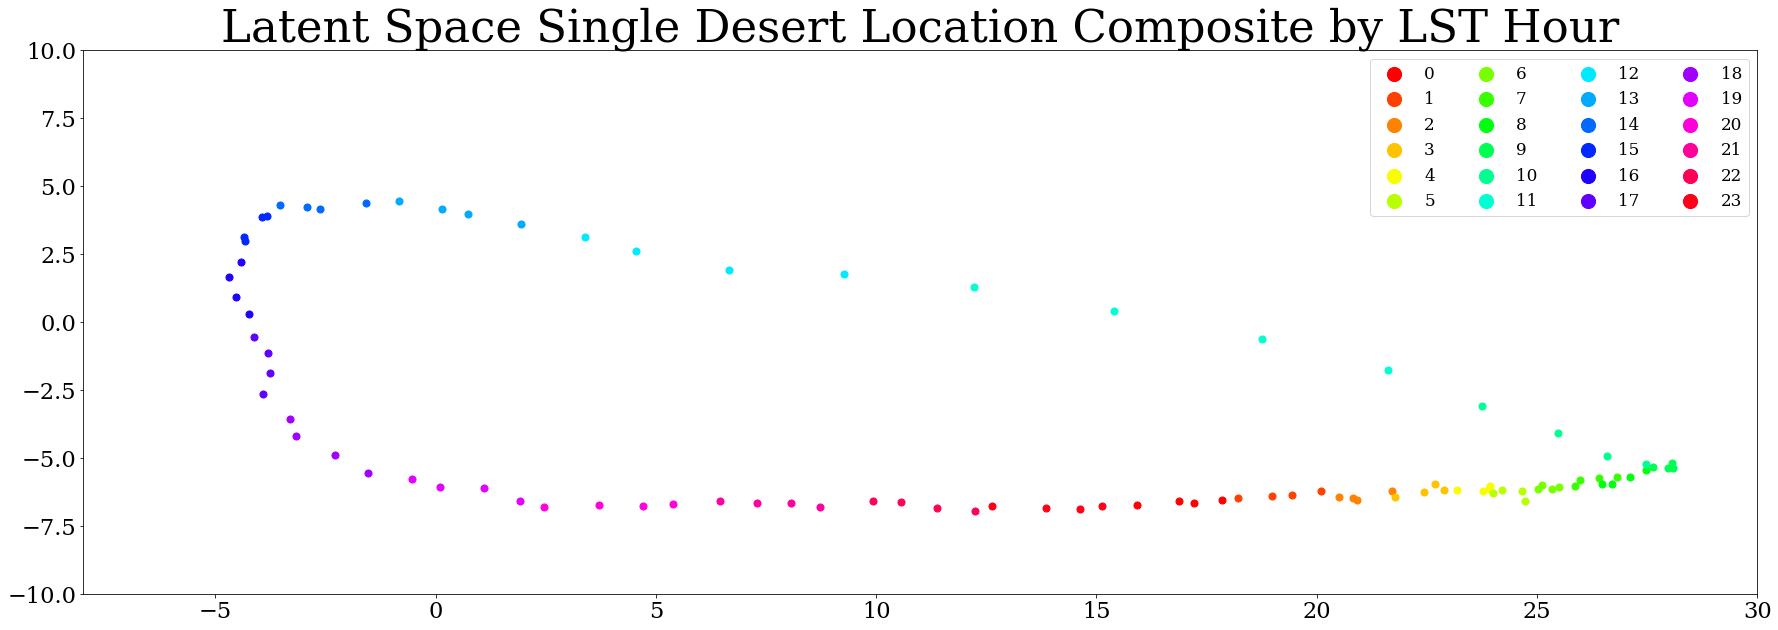

In [16]:
colors = cm.hsv(np.linspace(0, 1, 24))
fig, ax = plt.subplots(figsize=(30, 10))
obs = []
for i in range(len(desert_composite)):
    if int(desert_labels[i]) not in obs:
        obs.append(int(desert_labels[i]))
        ax.scatter(x=desert_composite[i, 0], y=desert_composite[i, 1], c=colors[int(desert_labels[i])], s=50.0, label = str(int(desert_labels[i])))
    else:
        ax.scatter(x=desert_composite[i, 0], y=desert_composite[i, 1], c=colors[int(desert_labels[i])], s=50.0)
        

                 
lgnd = ax.legend(loc="best", ncol=4, fontsize=fz*0.75)
for handle in lgnd.legendHandles:
    handle.set_sizes([200.0])
    
    

ax.set_title("Latent Space Single Desert Location Composite by LST Hour", fontsize=fz*2)
print(" ")

# Warm Pool

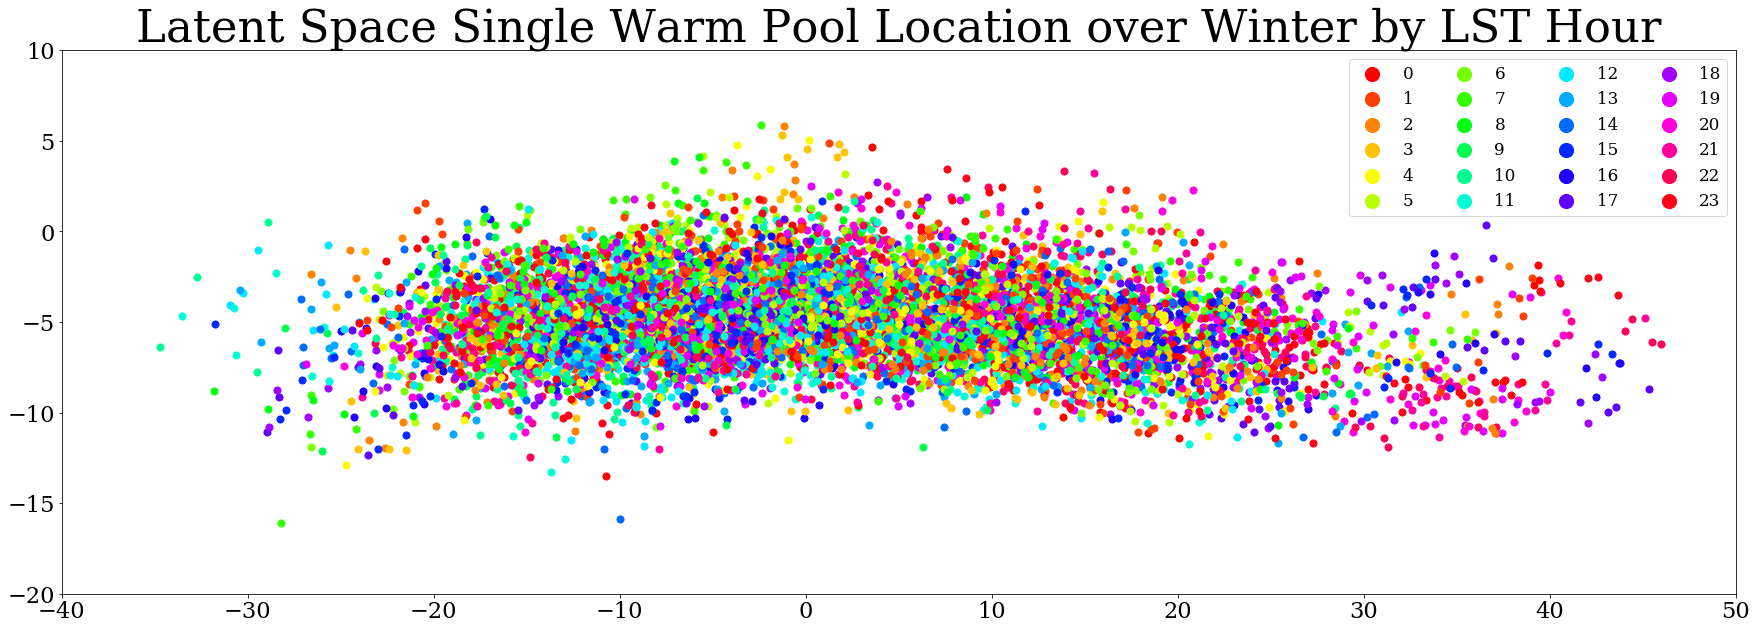

In [17]:
colors = cm.hsv(np.linspace(0, 1, 24))
fig, ax = plt.subplots(figsize=(30, 10))
obs = []
for i in range(len(All_Warm_Pool_Z)):
    if int(warm_pool_labels[i]) not in obs:
        obs.append(int(warm_pool_labels[i]))
        ax.scatter(x=All_Warm_Pool_Z[i, 0], y=All_Warm_Pool_Z[i, 1], c=colors[int(warm_pool_labels[i])], s=50.0, label = str(int(warm_pool_labels[i])))
    else:
        ax.scatter(x=All_Warm_Pool_Z[i, 0], y=All_Warm_Pool_Z[i, 1], c=colors[int(warm_pool_labels[i])], s=50.0)
        

                 
lgnd = ax.legend(loc="best", ncol=4, fontsize=fz*0.75)
for handle in lgnd.legendHandles:
    handle.set_sizes([200.0])
    
    

ax.set_title("Latent Space Single Warm Pool Location over Winter by LST Hour", fontsize=fz*2)
print(" ")

In [18]:
warm_pool_composite = np.empty(shape=(96,2))
for i in range(96):
    warm_pool_composite[i,:] = np.nanmean(All_Warm_Pool_Z[i::96,:],axis=0)

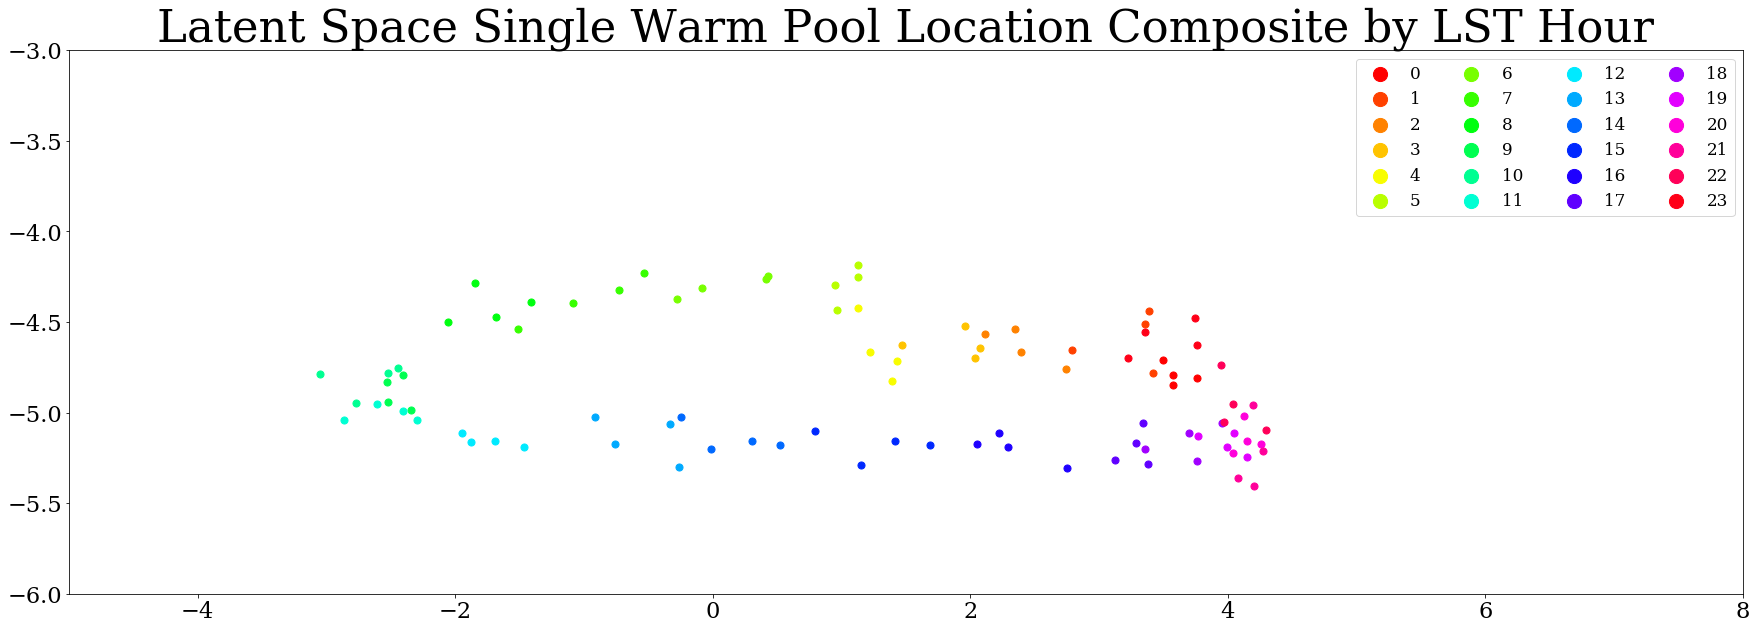

In [19]:
colors = cm.hsv(np.linspace(0, 1, 24))
fig, ax = plt.subplots(figsize=(30, 10))
obs = []
for i in range(len(warm_pool_composite)):
    if int(warm_pool_labels[i]) not in obs:
        obs.append(int(warm_pool_labels[i]))
        ax.scatter(x=warm_pool_composite[i, 0], y=warm_pool_composite[i, 1], c=colors[int(warm_pool_labels[i])], s=50.0, label = str(int(warm_pool_labels[i])))
    else:
        ax.scatter(x=warm_pool_composite[i, 0], y=warm_pool_composite[i, 1], c=colors[int(warm_pool_labels[i])], s=50.0)
        

                 
lgnd = ax.legend(loc="best", ncol=4, fontsize=fz*0.75)
for handle in lgnd.legendHandles:
    handle.set_sizes([200.0])
    
    

ax.set_title("Latent Space Single Warm Pool Location Composite by LST Hour", fontsize=fz*2)
print(" ")